In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
from matplotlib.lines import Line2D

In [2]:
angles = np.arange(0,360,30)

In [89]:
def rotate(angle, vector):
    # Clockwise rotation matrix
    rad = np.deg2rad(angle)
    mat = np.array([[np.cos(rad), np.sin(rad)],[-np.sin(rad), np.cos(rad)]])
    return mat.dot(vector)

def attatch_spider_chart(ax, center, angles, unit_length=1.0, annote=True, annote_margin=1.4):
    # Right West = 0 Degree
    # Right North = 90 Degree
    
    unit_vec = np.array([-unit_length, 0])
    rotateds = []
    for angle in angles:
        rotateds.append(rotate(angle,unit_vec))
        
    coords_2d = np.stack(rotateds)
        
    if annote:
        annote_xs = annote_margin * coords_2d[:,0] + 0.9 * center[0]
        annote_ys = annote_margin * coords_2d[:,1] + 0.9 * center[1]
        for angle, annote_x, annote_y in zip(angles, annote_xs, annote_ys):
            ax.annotate("{} $^\circ$".format(angle), (annote_x, annote_y))
    
    # Translation
    for rotated in rotateds:
        rotated[0] = rotated[0] + center[0]
        rotated[1] = rotated[1] + center[1]
    
    coords_2d = np.stack(rotateds)
    
    # Prepare outter polygon
    polygon = Polygon(coords_2d, closed=True, facecolor='white', edgecolor='k')
    polygon_patch = [polygon]
    
    # Prepare guide inner circles
    sub_levels = [0.8,0.6,0.4,0.2] # Order matters!
    circle_patch = []
    for sub_level in sub_levels:
        circle = Wedge((center), sub_level * unit_length, 0, 360, fill=False)
    
    # Prepare lines for indicating angles
    line_patch = []
    for rotated in rotateds:
        x = (center[0], rotated[0])
        y = (center[1], rotated[1])
        line = Line2D(x,y, c='grey', alpha=0.2)
        line_patch.append(line)

    p = PatchCollection(polygon_patch)
    p.set_facecolor('white')
    p.set_edgecolor('k')
    ax.add_collection(p)
    
    for line in line_patch:
        ax.add_line(line)
    
    c = PatchCollection(circle_patch)
    c.set_facecolor('white')
    c.set_edgecolor('grey')
    ax.add_collection(c)
    

def draw_values(ax, center, angles, preds, targets, unit_length=1.0):
    unit_vec = np.array([-unit_length, 0])
    rotateds = []
    for angle in angles:
        rotateds.append(rotate(angle,unit_vec))
    
    coords_2d = np.stack(rotateds)
    
    # Prepare prediction polygon
    pred_x = preds * coords_2d[:,0] + center[0]
    pred_y = preds * coords_2d[:,1] + center[1] 
    pred_xy = np.vstack((pred_x,pred_y)).T
    
    pred_polygon = Polygon(pred_xy, closed=True)
    pred_patch = [pred_polygon]
    
    # Prepare target polygon
    target_x = targets * coords_2d[:,0] + center[0]
    target_y = targets * coords_2d[:,1] + center[1]
    target_xy = np.vstack((target_x,target_y)).T
    
    target_polygon = Polygon(target_xy, closed=True)
    target_patch = [target_polygon]
    
    pr = PatchCollection(pred_patch, alpha=0.5)
    ax.add_collection(pr)
    
    t = PatchCollection(target_patch, alpha=0.5)
    t.set_facecolor('orange')
    ax.add_collection(t)

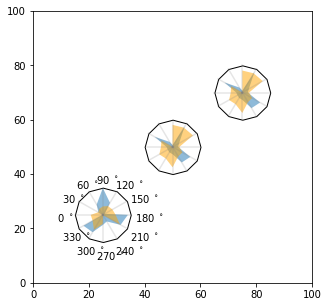

In [92]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(0,100)
ax.set_ylim(0,100)

target = np.random.rand(len(angles))
pred = np.random.rand(len(angles))

center1 = (25.0 ,25.0)
attatch_spider_chart(ax, center1, angles, annote=True, unit_length=10.0)
draw_values(ax, center1, angles, pred, target, unit_length=10.0)

target = np.random.rand(len(angles))
pred = np.random.rand(len(angles))

center2 = (50.0 ,50.0)
attatch_spider_chart(ax, center2, angles, annote=False, unit_length=10.0)
draw_values(ax, center2, angles, pred, target, unit_length=10.0)

center3 = (75.0 ,70.0)
attatch_spider_chart(ax, center3, angles, annote=False, unit_length=10.0)
draw_values(ax, center3, angles, pred, target, unit_length=10.0)